Clustering is a collection of unsupervised machine learning algorithm in which parts of the data are grouped based on similarity

Clusters may consist of data that is close together in n-dimensional Euclidean space.

Clustering is useful in cyber security for distinguishing between normal and anomalous network activity and for helping to classifiy malware into families

In [17]:
# Start by importing and plotting the dataset
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("dataset/file_pe_headers.csv", sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [8]:
fig = px.scatter_3d(
    df,
    x="SuspiciousImportFunctions",
    y="SectionsLength",
    z="SuspiciousNameSection",
    color="Malware",
)
fig.show()

In [3]:
# Extract the features and target labels
y = df["Malware"]
x = df.drop(["Name", "Malware"], axis=1).to_numpy()

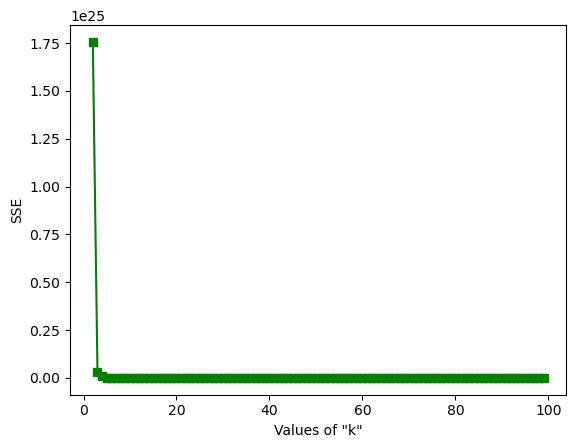

In [18]:
# Finding n_cluster value by elbow method
limit = int((x.shape[0]//2)**0.5)
sse = {}
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(x)
    sse[k] = model.inertia_
     
# plotting the wcss values
# to find out the elbow value
plt.plot(sse.keys(), sse.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('SSE')
plt.show()

In [4]:
# Now we will import scikit-learn's clustering module and fit a K-means model with 2 clusters to the data:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=len(set(y)))
estimator.fit(x)

KMeans(n_clusters=2)

In [5]:
# Predict the cluster using our trained algorithm
y_pred = estimator.predict(x)
df["pred"] = y_pred
df["pred"] = df["pred"].astype("category")

In [6]:
# We will see how the algorithm did and plot the algorithm's clusters
fig = px.scatter_3d(
    df,
    x="SuspiciousImportFunctions",
    y="SectionsLength",
    z="SuspiciousNameSection",
    color="pred",
)
fig.show()



1.   Step 1: We import our dataset of PE header information from a collection of samples. This dataset consists of 2 classes of PE files: malware and benign. We did use plotly to plot 3D graph

1.   Step 2: We set X as the features and y as the classes of the dataset. We aim to cluster the data into 2 groups that will match the sample classification.
2.   Step 3: We utilize K-means algorithm. With a throughoutly trained clustering algorithm, we are ready to predict on the testing set


2.   Step 4: we apply our clustering algorithm to predict to which cluster each of the samples should belong


1.   Step 5: we see that clustering has captured a lot of underlying information as it was able to fit the data well.



